In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(x):
    return 2 / (1 + np.exp(-x)) - 1

def phiPrime(phi):
    return (1 + phi)*(1 - phi) / 2

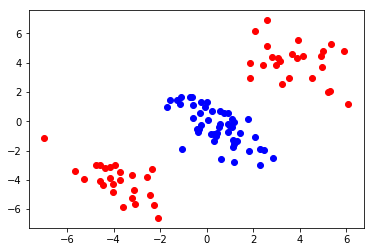

In [8]:
def genDataset1(train_N = 100, test_N = 100):
    """
    Generates a custom dataset for a classification problem with 2 classes.

    Args:
        train_N: number of training samples.
        test_N: number of testing samples.
        
    Returns:
        Tuple with the training data inputs, training data outputs, test data inputs and test data outputs.
        Input matrices have a shape of 2 x samples and output matrices a shape of  1 x samples.
    """
    # Initialize distribution parameters
    mu1 = [-4, -4]
    mu2 = [0, 0]
    mu3 = [4, 4]
    cov1 = [[1.5, -0.8],[-0.8, 1.5]]
    
    # Create training data
    class1_cluster_N = int(train_N / 4)
    class2_cluster_N = int(train_N / 2)
    X1_train = np.random.multivariate_normal(mu1, cov1, class1_cluster_N)
    X2_train = np.random.multivariate_normal(mu3, cov1,  class1_cluster_N)
    X3_train = np.random.multivariate_normal(mu2, cov1,  class2_cluster_N)
    X_train = np.concatenate((X1_train, X2_train, X3_train)).T
    T1_train = np.ones((1, class1_cluster_N * 2))
    T2_train = np.full((1, class2_cluster_N), -1)
    T_train = np.concatenate((T1_train, T2_train), axis = 1)
        
    # Create testing data
    class1_cluster_N = int(test_N / 4)
    class2_cluster_N = int(test_N / 2)
    X1_test = np.random.multivariate_normal(mu1, cov1, class1_cluster_N)
    X2_test = np.random.multivariate_normal(mu3, cov1,  class1_cluster_N)
    X3_test = np.random.multivariate_normal(mu2, cov1,  class2_cluster_N)
    X_test = np.concatenate((X1_test, X2_test, X3_test)).T
    T1_test = np.ones((1, class1_cluster_N * 2))
    T2_test = np.full((1, class2_cluster_N), -1)
    T_test = np.concatenate((T1_test, T2_test), axis = 1)
    
    return (X_train, T_train, X_test, T_test)
X_train, T_train, X_test, T_test = genDataset1()

def scatterPlotData(X, T):
    """Creates scatter plot for data given inputs X and target outputs T (with -1 and 1 values)"""
    inputDims = X.shape[0]
    sampleNo = X.shape[1]
    X1 = X[0].reshape((1, sampleNo))
    X2 = X[1].reshape((1, sampleNo))
    plt.scatter(X1[T == 1], X2[T == 1], color = 'r')
    plt.scatter(X1[T == -1], X2[T == -1], color = 'b')
    plt.show()
    
scatterPlotData(X_train, T_train)